# ■第3週_授業前課題1_アヤメの分析

## 【問題1】データの取得

In [9]:
'''
■注意点
iris.data には 4 つの特徴量(ガクの長さ、幅、花弁の長さ、幅)が格納されています。
iris.target には種類が格納されています。0(=setosa), 1(=versicolor), 2(=virginica) のいずれかです。
'''
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
X = pd.DataFrame(X)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = iris.target
y = pd.DataFrame(y)
y.columns = ['Species']
y.loc[y['Species'] == 0, 'Species'] = 'setosa'
y.loc[y['Species'] == 1, 'Species'] = 'versicolor'
y.loc[y['Species'] == 2, 'Species'] = 'virginica'
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [11]:
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 【問題3】データの確認

In [12]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [13]:
# ラベルごとのサンプル数の合計を出力する。
setosa = df['Species'] == 'setosa'
#戻り値がTrueかFalseで返ってくる
print('setosaの数は{}個'.format(setosa.sum()))
versicolor = df['Species'] == 'versicolor'
print('versicolorの数は{}個'.format(versicolor.sum()))
virginica = df['Species'] == 'virginica'
print('virginicaの数は{}個'.format(virginica.sum()))

setosaの数は50個
versicolorの数は50個
virginicaの数は50個


In [14]:
#特徴量に欠損値があるかを確認する。
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

In [15]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる
df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [16]:
df['sepal_width'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [17]:
df['petal_length'].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [18]:
df['petal_width'].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

## 【問題4】irisデータセット自体の調査

Iris setosa :毛先の尖ったアイリスとして知られる。背の低いものから高いものまで様々に存在する。花びらは幅58cm、長さは78cmありがく片は非常に小さい。
Iris virgicolor :青い花びらが特徴。アメリカ東部やカナダ東部に生息。10~80cmに成長する。6枚の花弁とがく片がある。毒性がある。
Iris virginica :花びらは幅4cm以上、長さが7cm以上であり3枚のがく片から成る。花びらとがく片の色は濃い紫からピンクがかった白まで様々。

## 【問題5】必要なデータを抽出

In [19]:
sepal_width1=df.loc[:,"sepal_width"]
sepal_width1.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [20]:
sepal_width2=df.iloc[:,1]
sepal_width2.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [21]:
df['sepal_width'].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [22]:
#50番目から99番目までのデータを抽出する
df[50:100].head()

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [23]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:100,['petal_length']].head()

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6


In [24]:
# petal_widthカラムの値が0.2のデータを抽出する
df[df['petal_width'] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa


#.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

行、列の指定方法が

loc ＝ 行ラベル、 列ラベル

iloc = 行の番号(0 ~ )、列の番号(0 ~ )

## 【問題6】図の作成

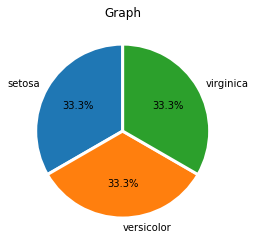

In [25]:
#ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Graph")
x = np.array([setosa.sum(),versicolor.sum(),virginica.sum()])
label = ['setosa', 'versicolor', 'virginica']
plt.pie(x, labels=label, wedgeprops={'linewidth': 3, 'edgecolor':"white"},autopct="%1.1f%%",startangle=90)
plt.show()

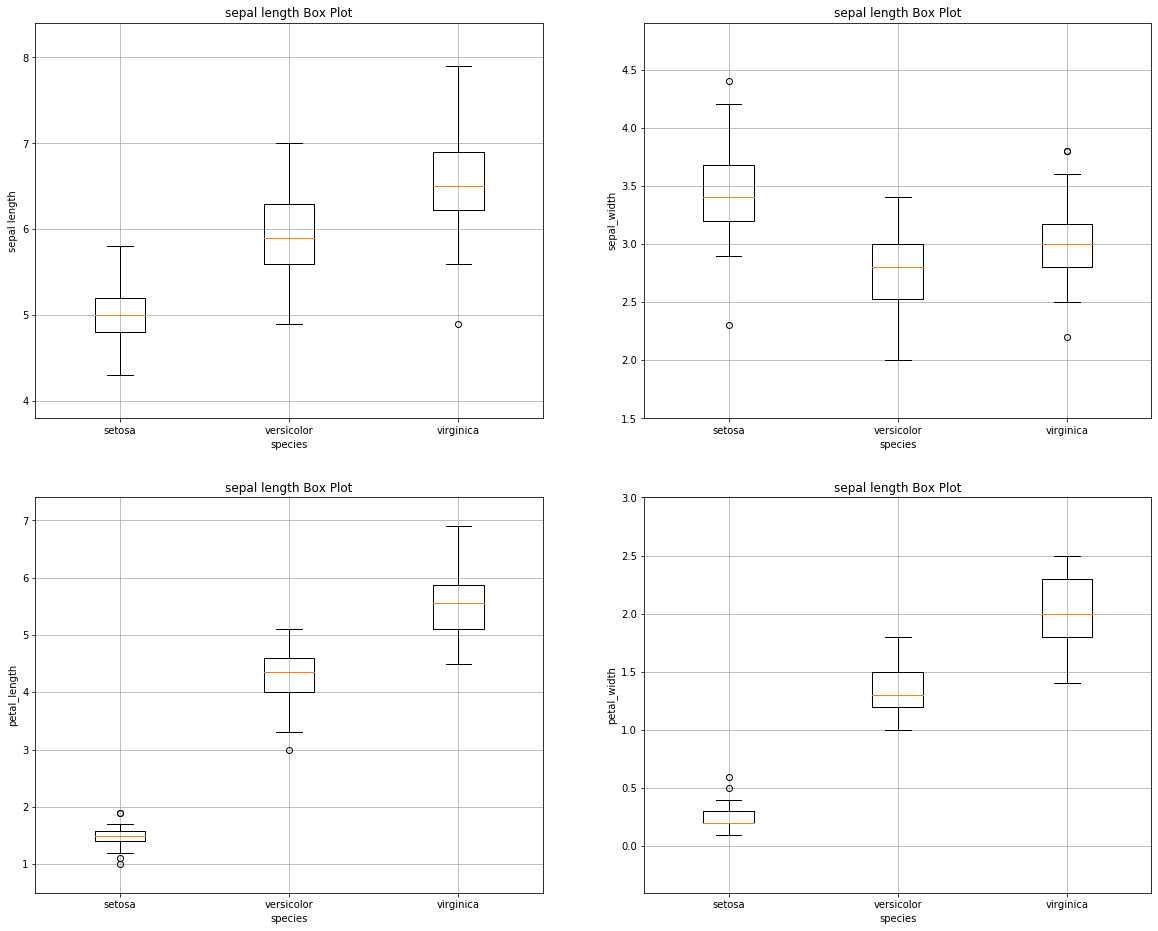

In [26]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
import matplotlib.pyplot as plt
%matplotlib inline
'''
■sepal lenghに関して
'''
setosa_data = df.query("Species == 'setosa'")
versicolor_data = df.query("Species == 'versicolor'")
virginica_data = df.query("Species == 'virginica'")

fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(2,2,1)
sepal_length = (setosa_data.iloc[:, 0], versicolor_data.iloc[:, 0], virginica_data.iloc[:, 0])
ax1.boxplot(sepal_length)
ax1.set_xticklabels(['setosa', 'versicolor', 'virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('sepal length')
plt.ylim([df['sepal_length'].min()-0.5,df['sepal_length'].max()+0.5])
plt.grid()

'''
■sepal_widthに関して
'''
ax2 = fig.add_subplot(2,2,2)
sepal_width = (setosa_data.iloc[:, 1], versicolor_data.iloc[:, 1], virginica_data.iloc[:, 1])
ax2.boxplot(sepal_width)
ax2.set_xticklabels(['setosa', 'versicolor', 'virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('sepal_width')
plt.ylim([df['sepal_width'].min()-0.5,df['sepal_width'].max()+0.5])
plt.grid()

'''
■petal_lengthに関して
'''
ax3 = fig.add_subplot(2,2,3)
petal_length = (setosa_data.iloc[:, 2], versicolor_data.iloc[:, 2], virginica_data.iloc[:, 2])
ax3.boxplot(petal_length)
ax3.set_xticklabels(['setosa', 'versicolor', 'virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.ylim([df['petal_length'].min()-0.5,df['petal_length'].max()+0.5])
plt.grid()


'''
■petal_widthに関して
'''
ax4 = fig.add_subplot(2,2,4)
petal_width = (setosa_data.iloc[:, 3], versicolor_data.iloc[:, 3], virginica_data.iloc[:, 3])
ax4.boxplot(petal_width)
ax4.set_xticklabels(['setosa', 'versicolor', 'virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('petal_width')
plt.ylim([df['petal_width'].min()-0.5,df['petal_width'].max()+0.5])
plt.grid()




plt.show()


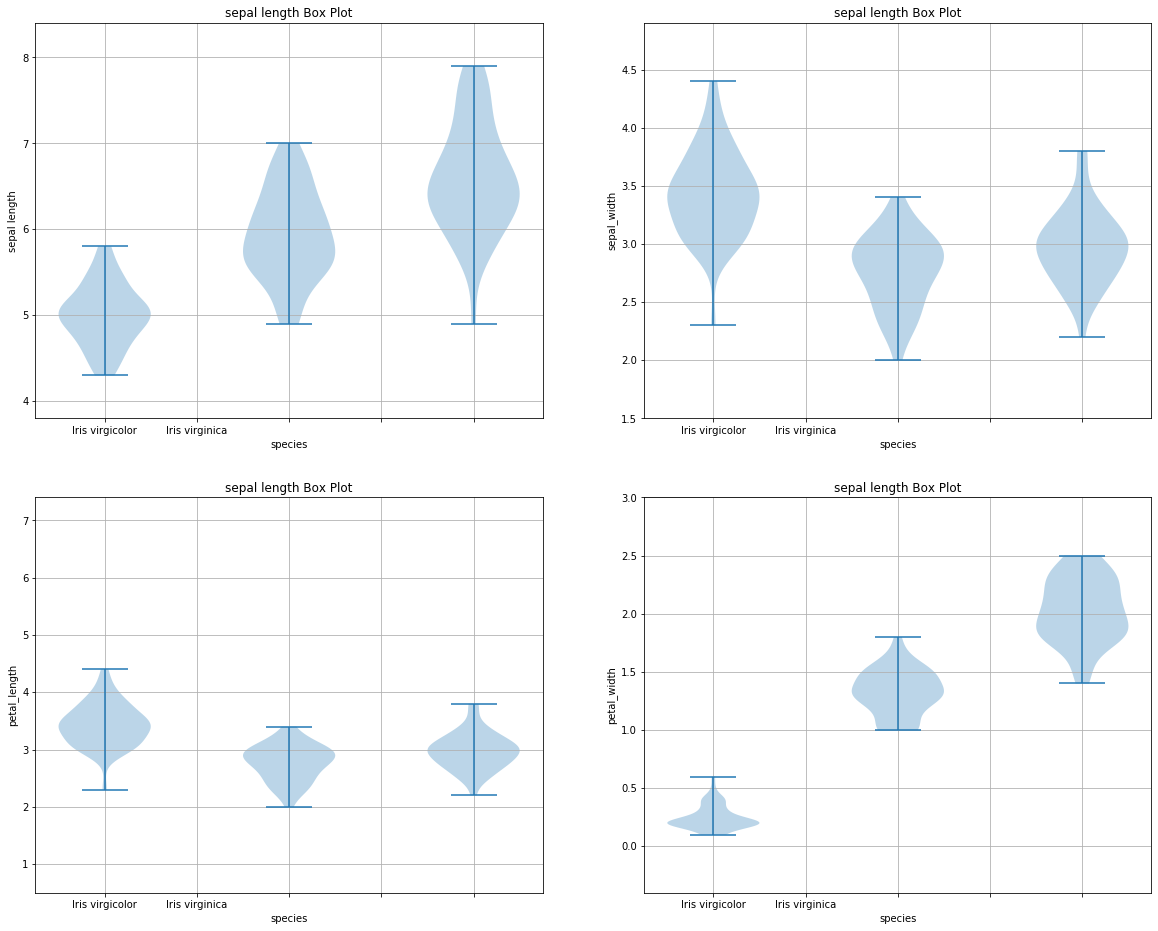

In [27]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(2, 2, 1)
sepal_lengths = (setosa_data.iloc[:, 0], versicolor_data.iloc[:,0], virginica_data.iloc[:,0])
ax1.violinplot(sepal_lengths)
ax1.set_xticklabels(['Iris setosa', 'Iris virgicolor', 'Iris virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('sepal length')
plt.ylim([df['sepal_length'].min()-0.5,df['sepal_length'].max()+0.5])
plt.grid()

'''
■sepal_widthに関して
'''
ax2 = fig.add_subplot(2, 2, 2)
sepal_width = (setosa_data.iloc[:,1], versicolor_data.iloc[:,1], virginica_data.iloc[:,1])
ax2.violinplot(sepal_width)
ax2.set_xticklabels(['Iris setosa', 'Iris virgicolor', 'Iris virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('sepal_width')
plt.ylim([df['sepal_width'].min()-0.5,df['sepal_width'].max()+0.5])
plt.grid()

'''
■petal_lengthに関して
'''
ax3 = fig.add_subplot(2, 2, 3)
petal_length = (setosa_data.iloc[:,2], versicolor_data.iloc[:,2], virginica_data.iloc[:,2])
ax3.violinplot(sepal_width)
ax3.set_xticklabels(['Iris setosa', 'Iris virgicolor', 'Iris virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.ylim([df['petal_length'].min()-0.5,df['petal_length'].max()+0.5])
plt.grid()

'''
■petal_widthに関して
'''
ax4 = fig.add_subplot(2, 2, 4)
petal_width = (setosa_data.iloc[:,3], versicolor_data.iloc[:,3], virginica_data.iloc[:,3])
ax4.violinplot(petal_width)
ax4.set_xticklabels(['Iris setosa', 'Iris virgicolor', 'Iris virginica'])
plt.title('sepal length Box Plot')
plt.xlabel('species')
plt.ylabel('petal_width')
plt.ylim([df['petal_width'].min()-0.5,df['petal_width'].max()+0.5])
plt.grid()

plt.show()


■箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

▼箱ひげ図のメリット ひとつは、複数のデータ（母集団）を同時に扱える点です。同じくデータのばらつきを可視化するヒストグラムで扱えるのは、原則としてひとつのデータのみ。複数データのばらつきを並べて比較するために重宝します。 もうひとつは、平均値ではなく中央値を用いることで、「実質的」なデータの「真ん中」を表現できる点です。

▼バイオリン図のメリット バイオリン図には箱ひげ図よりも多くの情報が含まれる。箱ひげ図には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、バイオリンプロットにはすべての分布データが含まれる。これはデータ分布がmultimodal（複数のピークがある）場合に特に有用である

## 【問題7】特徴量間の関係の確認

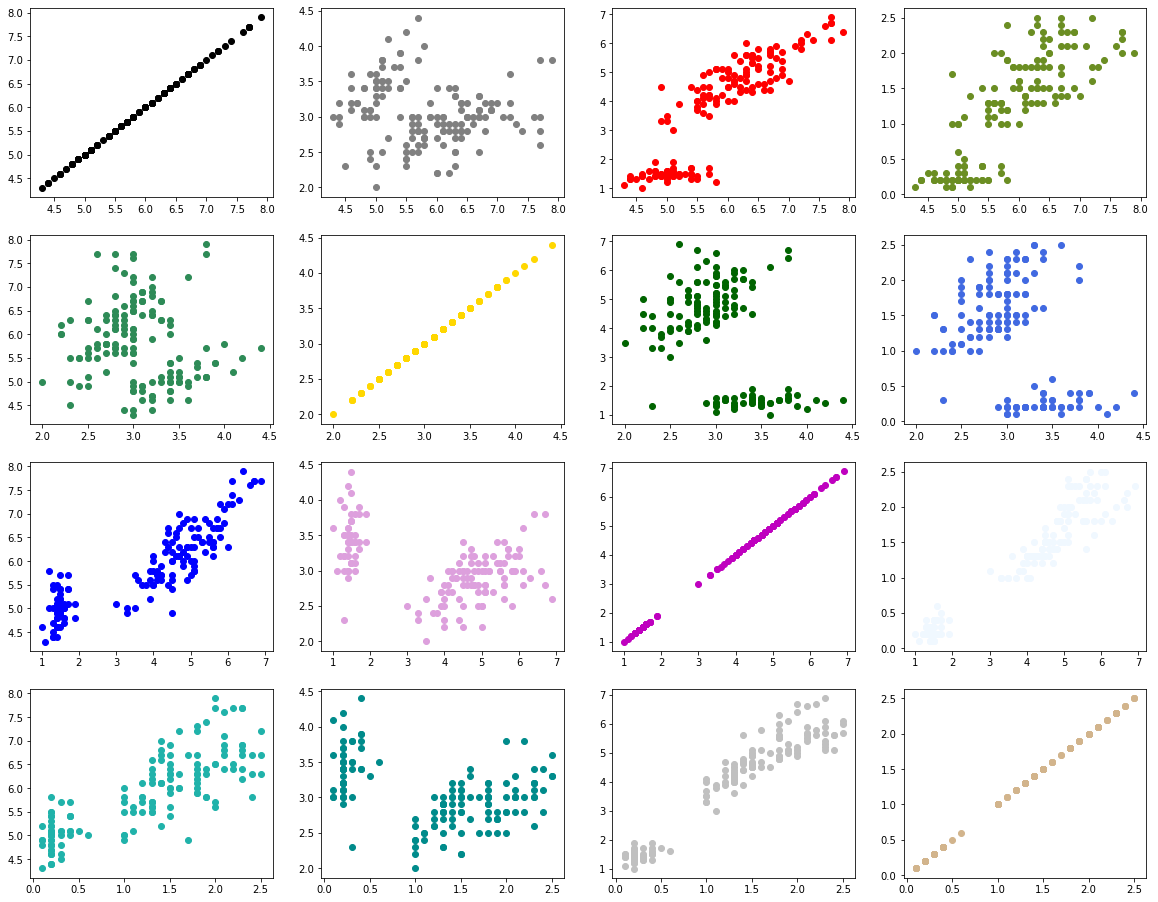

In [28]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
'''
■補足
c=色
'''
plt.figure(figsize=(20,16))

plt.subplot(4,4,1)
plt.scatter(df.iloc[:,0],df.iloc[:,0],c='k')

plt.subplot(4,4,2)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c='gray')

plt.subplot(4,4,3)
plt.scatter(df.iloc[:,0],df.iloc[:,2],c='red')

plt.subplot(4, 4, 4)
plt.scatter(df.iloc[:, 0], df.iloc[:, 3], c='olivedrab')

plt.subplot(4, 4, 5)
plt.scatter(df.iloc[:, 1], df.iloc[:, 0], c='seagreen')

plt.subplot(4, 4, 6)
plt.scatter(df.iloc[:, 1], df.iloc[:, 1], c='gold')

plt.subplot(4, 4, 7)
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c='darkgreen')

plt.subplot(4, 4, 8)
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c='royalblue')

plt.subplot(4, 4, 9)
plt.scatter(df.iloc[:, 2], df.iloc[:, 0], c='blue')

plt.subplot(4, 4, 10)
plt.scatter(df.iloc[:, 2], df.iloc[:, 1], c='plum')

plt.subplot(4, 4, 11)
plt.scatter(df.iloc[:, 2], df.iloc[:, 2], c='m')

plt.subplot(4, 4, 12)
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c='aliceblue')

plt.subplot(4, 4, 13)
plt.scatter(df.iloc[:, 3], df.iloc[:, 0], c='lightseagreen')

plt.subplot(4, 4, 14)
plt.scatter(df.iloc[:, 3], df.iloc[:, 1], c='darkcyan')

plt.subplot(4, 4, 15)
plt.scatter(df.iloc[:, 3], df.iloc[:, 2], c='silver')

plt.subplot(4, 4, 16)
plt.scatter(df.iloc[:, 3], df.iloc[:, 3], c='tan')



plt.show()

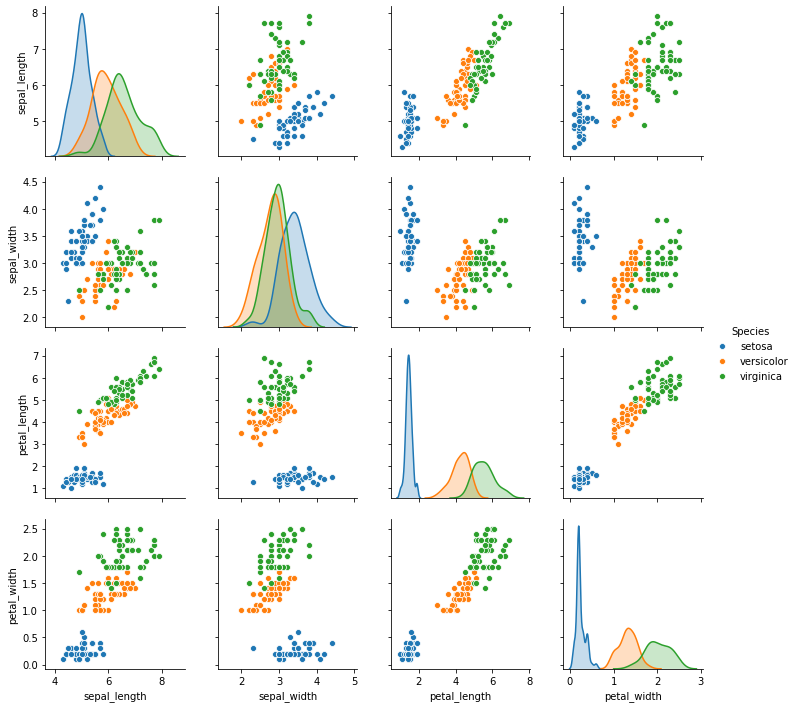

In [29]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作成
import seaborn as sns
sns.pairplot(df, hue='Species');

In [33]:
# ４つの特徴量に関する相関係数行列を作る
cor = df.corr()
cor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


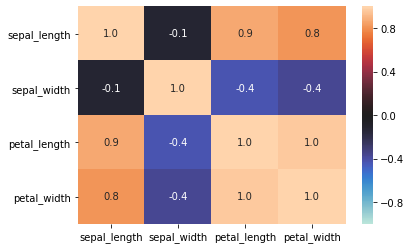

In [35]:
# 相関係数行列のヒートマップを作る
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cor,#ここに相関数列が入る
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values
           )
plt.show()

　箱ひげ図やバイオリン図から、花びらの形状に関してはsetosa < virgicolor < virginicaの順番で幅も長さも大きくなる。このことから花びらの幅と長さの間には正の相関が強く見られることが予見されるが、実際に相関係数行列のグラフや数値をみると相関係数が0.96と非常に高いことが分かる。

　がく片に関しての特筆すべき点は、setosaは幅が小さく長さが大きいことから細長い形状となる一方で、virginicaは幅に対して長さがそこまで大きくないことから横に長いという点である。virgicolorについては形状に関して特徴は見られない。

　最後に特徴量間の関係について述べる。先ほども見たように花びらに関しては幅と長さに関して非常に強い相関が見られる。対してがく片については幅と長さの間にわずかな負の相関が見られるが、相関と呼べるほどのものではない。花びらの長さとがく片の長さについて強い正の相関があることから花びらの長さが大きければがく片の長さも大きく逆もまた然りである。幅についても同じような考察ができる。